# Unsupervised Learning

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F2_unsupervised_learning.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- 
</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- 
</div>

## Unsupervised learning objective

Contrary to supervised learning, we only have:

- an *input* vector $\boldsymbol{X}$ of $X_1, \ldots, X_p$ input variables with a joint probability distribution $\mathbb{P}(\boldsymbol{X})$.

<hr>

**Supervised Learning Objective**
<br>
Directly infer some properties of $\mathbb{P}(\boldsymbol{X})$ from observations $\boldsymbol{x}_i, i = 1, \ldots N$. 

<hr>

- The dimension $p$ is usually large $\rightarrow$ not possible to directly estimate $\mathbb{P}(\boldsymbol{X})$ (e.g. histogram),
- and there is no direct measure of success,
- but we are not interested in learning how the distribution changes depending (conditioned) on some other variable.

### Curse of dimensionality

Often, the average number of observations $N$ required to capture some structure with a given level of accuracy increases exponentially with the dimension $p$.

For instance, the following example illustrates that, to achieve the same sampling density $\rho$ in a unit hypercube, we must have $N = \rho^p$.

Text(0.5, 0.92, 'p = 3, density = 10, N = 1000')

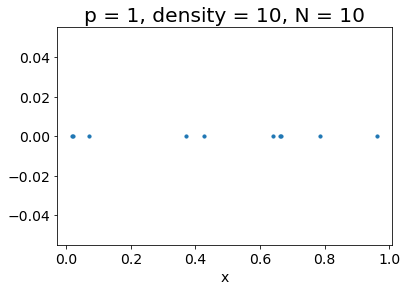

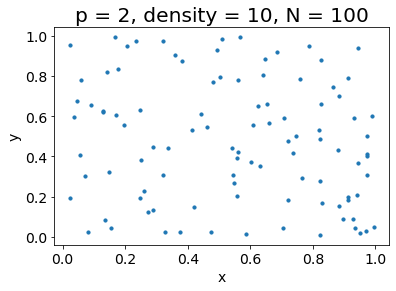

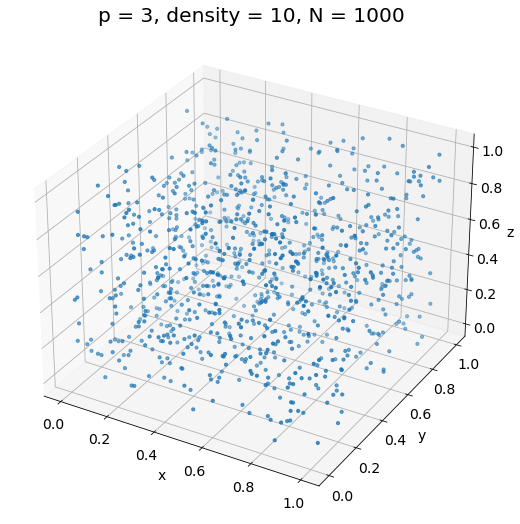

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)

# Number of points per unit hypercube
density = 10

# Get as many observations drawn from a uniform distribution
# as needed to get the given density for of hypercube of dimension p
def get_observations(p, density):
    return np.random.rand(density**p, p)

# Plot configuration
xlim = [0, 1]
markersize = 10

# Plot observations for 1 dimension
p = 1
X = get_observations(p, density)
plt.figure()
plt.scatter(X, np.zeros(X.shape), s=markersize)
plt.xlabel('x')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

# Plot observations for 2 dimensions
p = 2
X = get_observations(p, density)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=markersize)
plt.xlabel('x')
plt.ylabel('y')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

# Plot observations for 3 dimensions
p = 3
X = get_observations(p, density)
fig = plt.figure(figsize=[12, 9])
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=markersize)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('p = {}, density = {}, N = {}'.format(
    p, density, X.shape[0]))

## Applications

- Dimension reduction/feature selection/pattern identification (PCA, multidim. scaling, self-organizing maps, principal curves, ...):
  - identify low-dimensional hypersurfaces (manifolds) in $\boldsymbol{X}$-space
  - provide information about associations among variables
  - express input variables as functions of a smaller set of "latent"/"hidden" variables
- Identify modes (local maxima) of $\mathbb{P}(\boldsymbol{X})$ (cluster analysis, mixture modeling)


## Principal Component Analysis

